In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst
import importlib

In [2]:
param_est = OnlineParamEst()
# 1) Run both simulations
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA()
print("finished DEKA simulation")

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
step  5
exited at 0.00013036869479699816 in 0 iterations
step  10
exited at 0.00012031022016369178 in 0 iterations
step  15
exited at 7.580497806070368e-05 in 0 iterations
step  20
exited at 6.870702851435668e-05 in 0 iterations
step  25
exited at 2.947218344879348e-05 in 0 iterations
step  30
exited at 2.7834562002687482e-05 in 1 iterations
step  35
max iter reached
step  40
max iter reached
step  45
max iter reached
step  50
max iter reached
smoothed at step 50 with value 1.0345434694034967: 
step  55
max iter reached
smoothed at step 55 with value 0.9566440992560543: 
step  60
max iter reached
smoothed at step 60 with value 0.7358370735982873: 
step  65
max iter reached
smoothed at step 65 with value 0.37871230918876125: 
step  70
max iter reached
smoothed at step 70 with value 0.247

In [3]:
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_hover_with_RLS()
print("finished RLS simulation")

Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
finished RLS simulation


In [4]:
x_kf,  u_kf,  theta_kf,  theta_hat_kf  = param_est.simulate_quadrotor_hover_with_KF()
print("finished KF simulation")
# x_mpc,  u_mpc,  theta_mpc,  theta_hat_mpc  = param_est.simulate_quadrotor_hover_with_no_estimation()
# print("finished naive mpc simulation")


# Suppose x_deka, x_rls each have shape (N, 3) for position in x,y,z.
# Also assume you have a desired (reference) trajectory x_des, shape (N, 3).
num_points = 600
angles = np.linspace(0, 6*np.pi, num_points, endpoint=False)
# Create the figure-8 in the XY-plane
x = np.sin(angles)
y = np.sin(2 * angles)
z = np.zeros_like(x)  # Initially flat in XY-plane

# Stack as a (3, num_points) matrix
traj = np.vstack((x, y, z))  # Shape: (3, num_points)

# Define rotation matrix (tilt around the Y-axis)
rot_ang= np.radians(30)  # Tilt angle in degrees
R = np.array([
    [np.cos(rot_ang), 0, np.sin(rot_ang)],  # Rotation matrix for X-Z plane
    [0, 1, 0],  # Keep Y unchanged
    [-np.sin(rot_ang), 0, np.cos(rot_ang)]
])

# Apply rotation
traj_rotated = (R @ traj).T  # Matrix multiplication
x_des = traj.T  # Transpose back to original shape
# 2) Plot x, y, z positions for DEKA vs RLS vs desired
t = np.arange(200)  # time steps 0..N-1


Perturbed Intitial State: 
[ 0.2           0.2          -0.2           0.7071067812  0.7071067812
  0.            0.            0.            0.            0.
  0.            0.            0.          ]
finished KF simulation


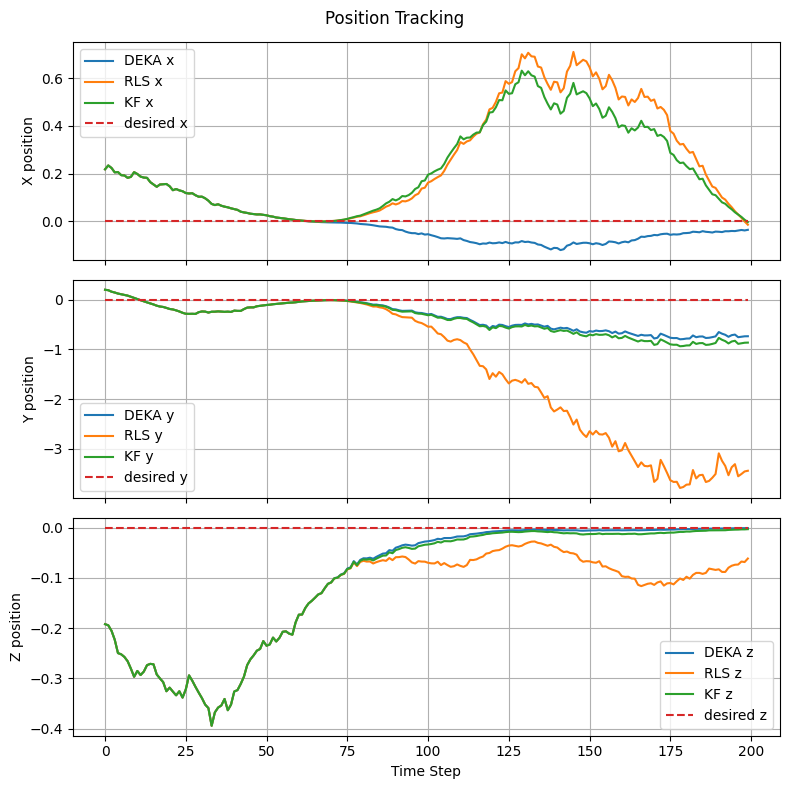

In [5]:
x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_kf   = [row[0] for row in x_kf]
# x_pos_mpc = [row[0] for row in x_mpc]
# x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_kf   = [row[1] for row in x_kf]
# y_pos_mpc = [row[1] for row in x_mpc]

# y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_kf   = [row[2] for row in x_kf]
# z_pos_mpc = [row[2] for row in x_mpc]

# z_pos_des   = [row[2] for row in x_des][:200]

hov_des = np.linspace(0,0,200)

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_kf)
theta_ekf_array = np.array(theta_kf)

hov_des = np.zeros_like(x_pos_deka)
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
# X position
axs[0].plot(t, x_pos_deka, label='DEKA x')
axs[0].plot(t, x_pos_rls, label='RLS x')
axs[0].plot(t, x_pos_kf, label='KF x')
# axs[0].plot(t, x_pos_mpc, '.', label='No Est. x')
axs[0].plot(t, hov_des, '--', label='desired x')
axs[0].set_ylabel('X position')
axs[0].legend()
axs[0].grid(True)

# Y position
axs[1].plot(t, y_pos_deka, label='DEKA y')
axs[1].plot(t, y_pos_rls, label='RLS y')
axs[1].plot(t, y_pos_kf, label='KF y')
# axs[1].plot(t, y_pos_mpc, '.', label='No Est. y')
axs[1].plot(t, hov_des, '--', label='desired y')
axs[1].set_ylabel('Y position')
axs[1].legend()
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, label='DEKA z')
axs[2].plot(t, z_pos_rls, label='RLS z')
axs[2].plot(t, z_pos_kf, label='KF z')
# axs[2].plot(t, y_pos_mpc, '.', label='No Est. y')
axs[2].plot(t, hov_des, '--', label='desired z')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Z position')
axs[2].legend()
axs[2].grid(True)

fig.suptitle('Position Tracking')
plt.tight_layout()
plt.show()



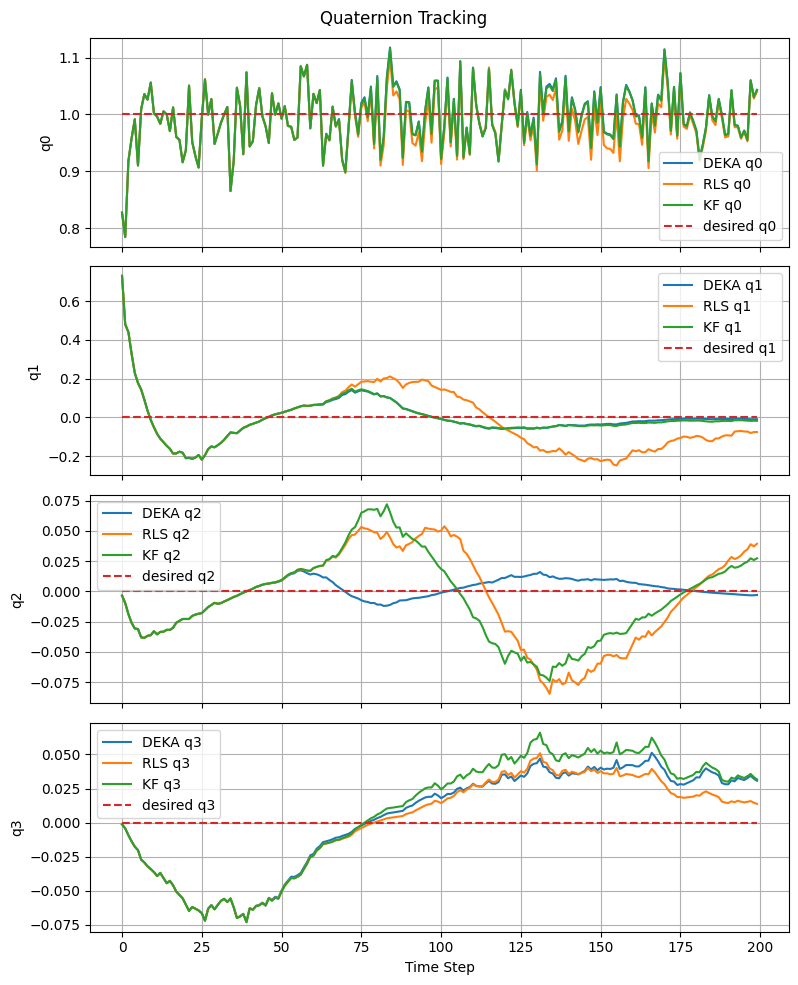

In [6]:
q0_deka  = [row[3] for row in x_deka]
q0_rls   = [row[3] for row in x_rls]
q0_kf   = [row[3] for row in x_kf]
q0_des = np.linspace(1,1,200)

q1_deka  = [row[4] for row in x_deka]
q1_rls   = [row[4] for row in x_rls]
q1_kf   = [row[4] for row in x_kf]
q1_des = np.linspace(0,0,200)

q2_deka  = [row[5] for row in x_deka]
q2_rls   = [row[5] for row in x_rls]
q2_kf   = [row[5] for row in x_kf]
q2_des = np.linspace(0,0,200)


q3_deka  = [row[6] for row in x_deka]
q3_rls   = [row[6] for row in x_rls]
q3_kf   = [row[6] for row in x_kf]
q3_des = np.linspace(0,0,200)

# Create subplots for quaternion components
fig, axs = plt.subplots(4, 1, figsize=(8, 10), sharex=True)

# q0 component
axs[0].plot(t, q0_deka, label='DEKA q0')
axs[0].plot(t, q0_rls, label='RLS q0')
axs[0].plot(t, q0_kf, label='KF q0')
axs[0].plot(t, q0_des, '--', label='desired q0')    
axs[0].set_ylabel('q0')
axs[0].legend()
axs[0].grid(True)

# q1 component
axs[1].plot(t, q1_deka, label='DEKA q1')
axs[1].plot(t, q1_rls, label='RLS q1')
axs[1].plot(t, q1_kf, label='KF q1')
axs[1].plot(t, q1_des, '--', label='desired q1')
axs[1].set_ylabel('q1')
axs[1].legend()
axs[1].grid(True)

# q2 component
axs[2].plot(t, q2_deka, label='DEKA q2')
axs[2].plot(t, q2_rls, label='RLS q2')
axs[2].plot(t, q2_kf, label='KF q2')
axs[2].plot(t, q2_des, '--', label='desired q2')
axs[2].set_ylabel('q2')
axs[2].legend()
axs[2].grid(True)

# q3 component
axs[3].plot(t, q3_deka, label='DEKA q3')
axs[3].plot(t, q3_rls, label='RLS q3')
axs[3].plot(t, q3_kf, label='KF q3')
axs[3].plot(t, q3_des, '--', label='desired q3')
axs[3].set_xlabel('Time Step')
axs[3].set_ylabel('q3')
axs[3].legend()
axs[3].grid(True)

# Set title and layout
fig.suptitle('Quaternion Tracking')
plt.tight_layout()
plt.show()


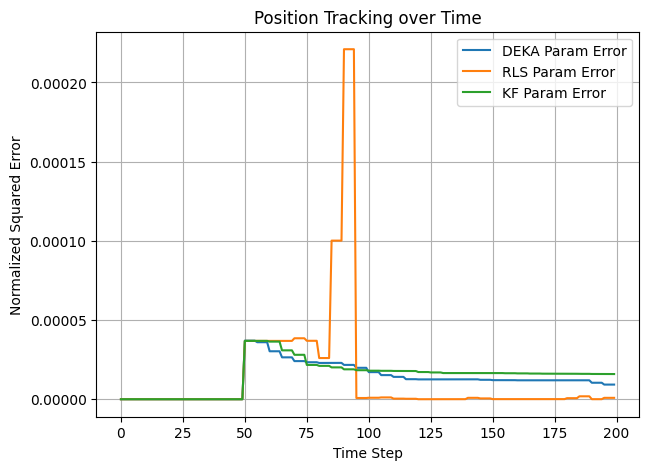

In [7]:
# 3) Compute and plot normalized squared error of parameter estimates
#    E.g. if theta_history is shape (N, p), we can do:
#    param_error = sum((theta_hat - theta)^2) / sum(theta^2), per time step.

param_error_deka =np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
                   / np.sum(theta_deka_array**2, axis=1)
param_error_rls  = np.sum((theta_hat_rls_array  - theta_rls_array )**2, axis=1) \
                   / np.sum(theta_rls_array**2, axis=1)
param_error_ekf  = np.sum((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1) \
                   / np.sum(theta_ekf_array**2, axis=1)
# For each time i, compute MSE across parameters
mse_deka_time = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
mse_rls_time  = np.mean((theta_hat_rls_array  - theta_rls_array )**2, axis=1)
mse_ekf_time  = np.mean((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1)

plt.figure(figsize=(7,5))
plt.plot(t, mse_deka_time, label='DEKA Param Error')
plt.plot(t, mse_rls_time,  label='RLS Param Error')
plt.plot(t, mse_ekf_time,  label='KF Param Error')

plt.xlabel('Time Step')
plt.ylabel('Normalized Squared Error')
plt.title('Position Tracking over Time')
plt.grid(True)
plt.legend()
plt.show()


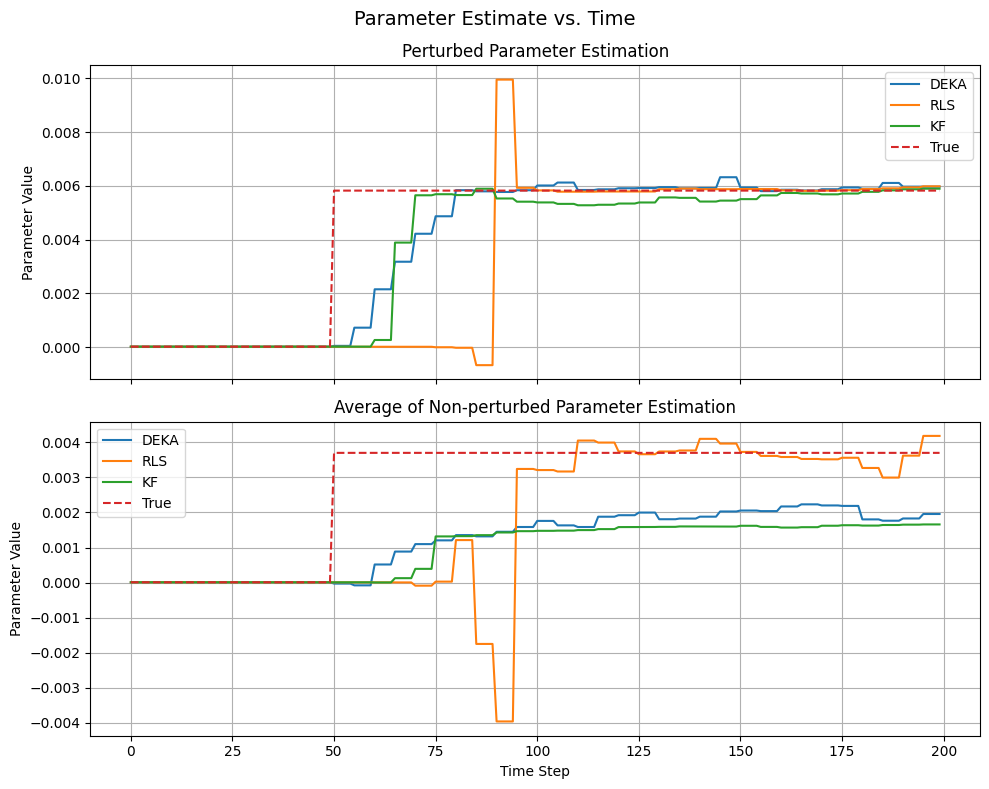

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the following arrays are already defined:
# t: a 1D array for time steps
# theta_hat_deka_array: estimated parameters from DEKA, shape (N, num_params)
# theta_hat_rls_array: estimated parameters from RLS, shape (N, num_params)
# theta_hat_ekf_array: estimated parameters from EKF, shape (N, num_params)
# theta_deka_array: true parameter values, shape (N, num_params)

# Create one figure with two subplots (stacked vertically)
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# ---------------------------
# Subplot 1: Parameter 0 (shifted parameter)
# ---------------------------
fig.suptitle('Parameter Estimate vs. Time', fontsize=14)

axs[0].plot(t, theta_hat_deka_array[:, 0], label='DEKA')
axs[0].plot(t, theta_hat_rls_array[:, 0], label='RLS')
axs[0].plot(t, theta_hat_ekf_array[:, 0], label='KF')
axs[0].plot(t, theta_ekf_array[:, 0], '--', label='True')
axs[0].set_title('Perturbed Parameter Estimation')
axs[0].set_ylabel('Parameter Value')
axs[0].legend()
axs[0].grid(True)

# ---------------------------
# Subplot 2: Average of Remaining Parameters (parameters 1 to end)
# ---------------------------
# Compute the average (across parameter indices 1 to end) for each time step.
theta_hat_deka_avg = np.mean(theta_hat_deka_array[:, 1:], axis=1)
theta_hat_rls_avg  = np.mean(theta_hat_rls_array[:, 1:], axis=1)
theta_hat_ekf_avg  = np.mean(theta_hat_ekf_array[:, 1:], axis=1)
theta_deka_avg     = np.mean(theta_deka_array[:, 1:], axis=1)

axs[1].plot(t, theta_hat_deka_avg, label='DEKA')
axs[1].plot(t, theta_hat_rls_avg, label='RLS')
axs[1].plot(t, theta_hat_ekf_avg, label='KF')
axs[1].plot(t, theta_deka_avg, '--', label='True')
axs[1].set_title('Average of Non-perturbed Parameter Estimation')
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Parameter Value')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

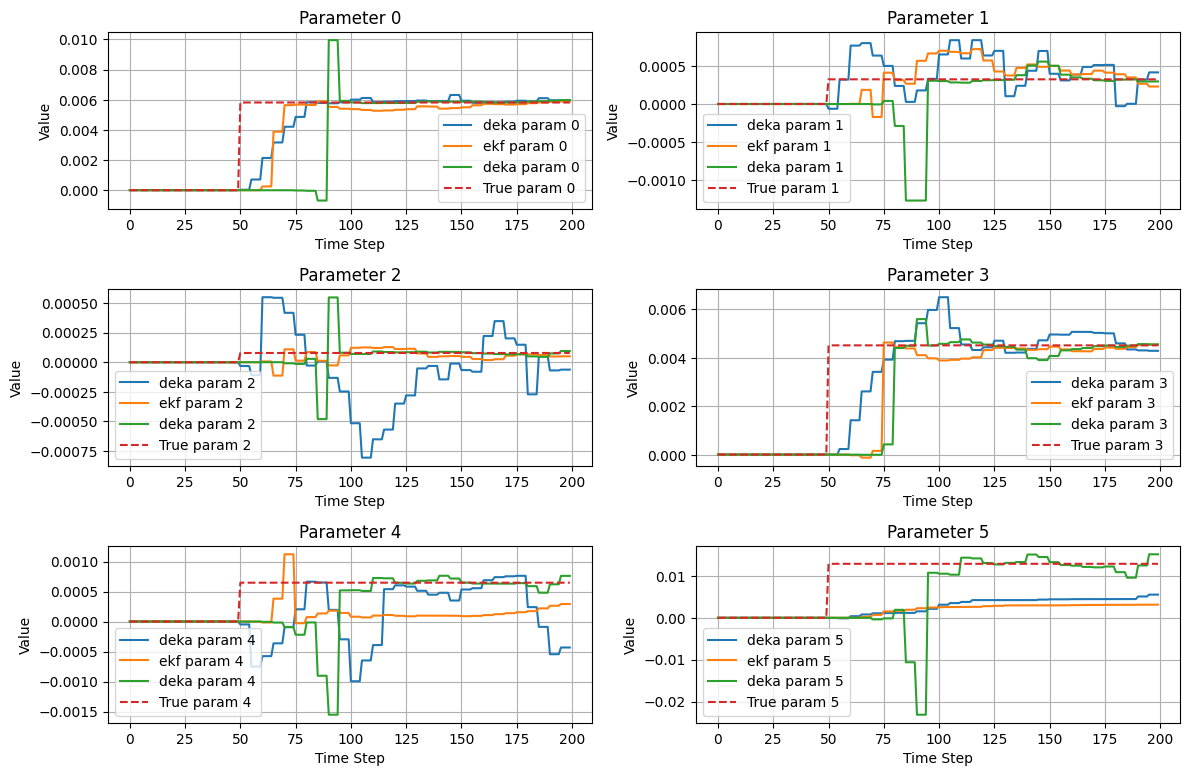

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the following arrays are already defined:
# t: a 1D array for time steps
# theta_hat_deka_array: estimated parameters from DEKA, shape (N, num_params)
# theta_hat_rls_array: estimated parameters from RLS, shape (N, num_params)
# theta_hat_ekf_array: estimated parameters from EKF, shape (N, num_params)
# theta_deka_array: true parameter values, shape (N, num_params)

for j in range(6):
    axs[j].plot(t, theta_hat_deka_array[:, j], label=f'deka param {j}')
    axs[j].plot(t, theta_hat_ekf_array[:, j], label=f'ekf param {j}')
    axs[j].plot(t, theta_hat_rls_array[:, j], label=f'deka param {j}')
    axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)
axs[-2].set_visible(False)


plt.tight_layout()
plt.show()


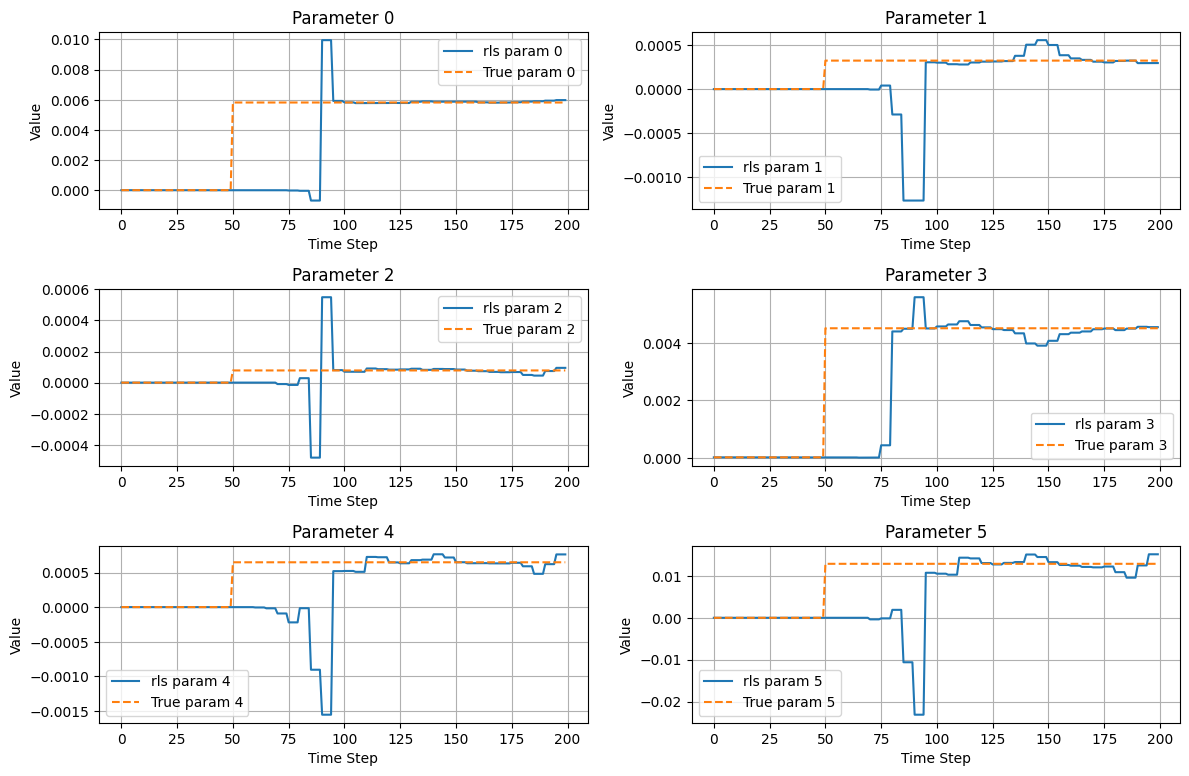

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten() # Make it a 1D list of axes for easy iteration

for j in range(6):
    axs[j].plot(t, theta_hat_rls_array[:, j], label=f'rls param {j}')
    axs[j].plot(t, theta_rls_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)
axs[-2].set_visible(False)


plt.tight_layout()
plt.show()


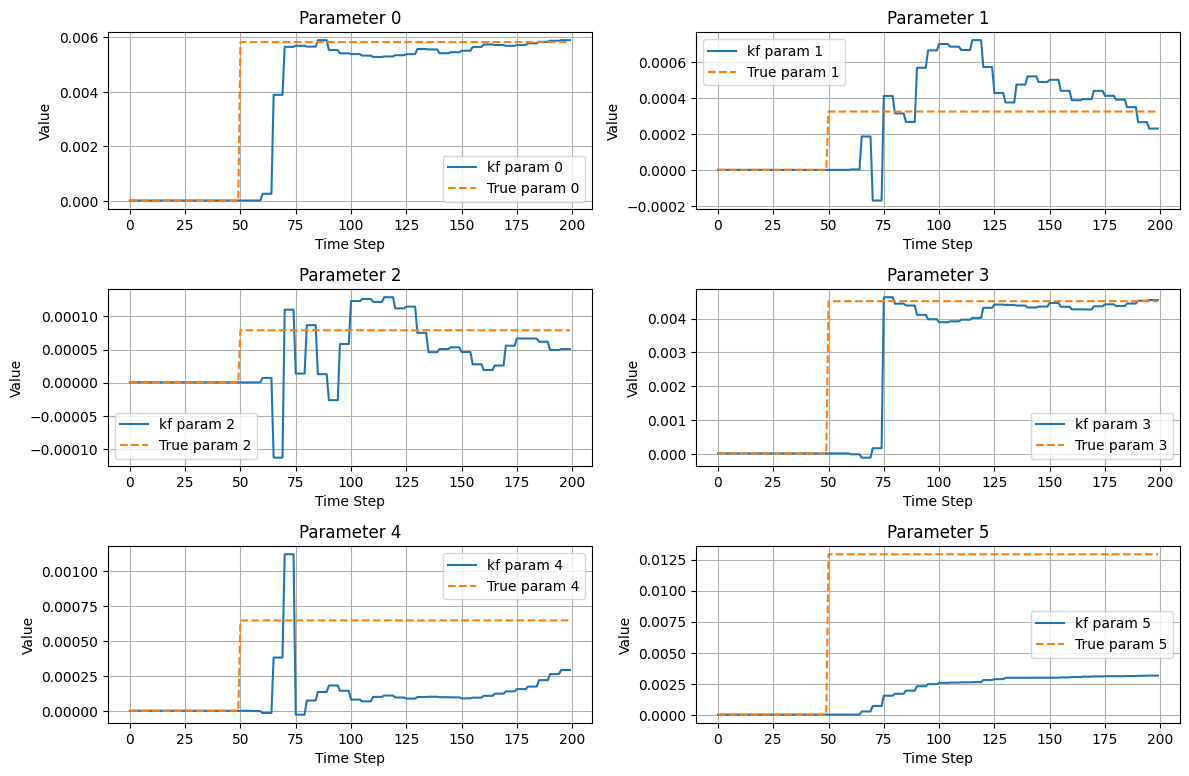

In [11]:
fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

for j in range(6):
    axs[j].plot(t, theta_hat_ekf_array[:, j], label=f'kf param {j}')
    axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)
axs[-2].set_visible(False)


plt.tight_layout()
plt.show()

## Simulate 100 times to obtain average mse comparison 

In [12]:
# import numpy as np
# param_est = OnlineParamEst()

# num_runs = 100

# mse_deka_list = []
# mse_rls_list  = []
# mse_kf_list  = []

# for run_idx in range(num_runs):
#     # 1) Run your three simulations
#     x_deka,  u_deka,  theta_deka,  theta_hat_deka   = param_est.simulate_quadrotor_hover_with_DEKA()
#     x_rls,   u_rls,   theta_rls,   theta_hat_rls    = param_est.simulate_quadrotor_hover_with_RLS()
#     x_kf,   u_kf,   theta_kf,   theta_hat_kf    = param_est.simulate_quadrotor_hover_with_KF()
    
#     # 2) Convert lists to arrays (if needed)
#     theta_deka_array     = np.array(theta_deka)
#     theta_hat_deka_array = np.array(theta_hat_deka)
#     theta_rls_array      = np.array(theta_rls)
#     theta_hat_rls_array  = np.array(theta_hat_rls)
#     theta_kf_array      = np.array(theta_kf)
#     theta_hat_kf_array  = np.array(theta_hat_kf)

#     # 3) Compute MSE for each method in this run
#     #    (One single MSE across all time steps & parameters)
#     mse_deka = np.mean((theta_hat_deka_array - theta_deka_array)**2)
#     mse_rls  = np.mean((theta_hat_rls_array  - theta_rls_array)**2)
#     mse_kf  = np.mean((theta_hat_kf_array  - theta_kf_array)**2)

#     # 4) Append them to lists for averaging later
#     mse_deka_list.append(mse_deka)
#     mse_rls_list.append(mse_rls)
#     mse_kf_list.append(mse_kf)

# # 5) After num_runs, compute average MSE
# avg_mse_deka = np.mean(mse_deka_list)
# avg_mse_rls  = np.mean(mse_rls_list)
# avg_mse_kf  = np.mean(mse_kf_list)

# # 6) Print or store these results
# print("Average MSE (DEKA):", avg_mse_deka)
# print("Average MSE (RLS): ", avg_mse_rls)
# print("Average MSE (KF): ", avg_mse_kf)